In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/hardi/Documents/Instacart_Baskey_analysis"

In [3]:
#reading the dataset
df_final = pd.read_pickle(os.path.join(path,"Data", "prepare_data", "customer_order_product_combine.pkl"))

In [6]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,...,frequency_flag,First Name,last_name,Gender,State,Age,date_joined,Number_dependants,Family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   product_id                 int64   
 1   product_name               object  
 2   aisle_id                   int64   
 3   department_id              int64   
 4   prices                     float64 
 5   order_id                   int64   
 6   user_id                    int64   
 7   order_number               int64   
 8   orders_day_of_the_week     int64   
 9   order_hour_of_day          int64   
 10  days_since_last_order      float64 
 11  add_to_cart_order          int64   
 12  reordered                  int64   
 13  _merge                     category
 14  busiest_day                object  
 15  busiest_days               object  
 16  busiest_period_of_day      object  
 17  max_number_order           int64   
 18  loyalty_flag               object  
 19  mean_price_spent_cu

In [4]:
df_final.shape

(32404859, 32)

#### PII: First_Name, Last_Name, Sex, State, Age, date_joined, Marital_status.
#### 
Completely remove First_Name and Last_Name to avoid direct identification.

In [4]:
df_final = df_final.drop(columns=['First Name','last_name'])

#### create region columns from state columns

In [5]:
state_to_region = {'Maine' : 'Northeast','New Hampshire' : 'Northeast','Vermont' : 'Northeast','Massachusetts' : 'Northeast','Rhode Island' : 'Northeast','Connecticut' : 'Northeast','New York' : 'Northeast','Pennsylvania' : 'Northeast','New Jersey' : 'Northeast','Wisconsin' : 'Midwest','Michigan' : 'Midwest','Illinois' : 'Midwest','Indiana' : 'Midwest','Ohio' : 'Midwest','North Dakota' : 'Midwest','South Dakota' : 'Midwest','Nebraska' : 'Midwest','Kansas' : 'Midwest','Minnesota' : 'Midwest','Iowa' : 'Midwest','Missouri' : 'Midwest','Delaware' : 'South','Maryland' : 'South','District of Columbia' : 'South','Virginia' : 'South','West Virginia' : 'South','North Carolina' : 'South','South Carolina' : 'South','Georgia' : 'South','Florida' : 'South','Kentucky' : 'South','Tennessee' : 'South','Mississippi' : 'South','Alabama' : 'South','Oklahoma' : 'South','Texas' : 'South','Arkansas' : 'South','Louisiana' : 'South','Idaho' : 'West','Montana' : 'West','Wyoming' : 'West','Nevada' : 'West','Utah' : 'West','Colorado' : 'West','Arizona' : 'West','New Mexico' : 'West','Alaska' : 'West','Washington' : 'West','Oregon' : 'West','California' : 'West','Hawaii' : 'West'}

In [6]:
# add column region from state columns
df_final['region'] = df_final['State'].map(state_to_region)

### 3b. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [13]:
#create crosstable using s[emding_flag and region
crosstab = pd.crosstab(df_final['region'],df_final['spending_flag'],dropna=False)

In [14]:
print(crosstab)

spending_flag  High spender  Lower spender
region                                    
Midwest              155975        7441350
Northeast            108225        5614511
South                209691       10582194
West                 160354        8132559


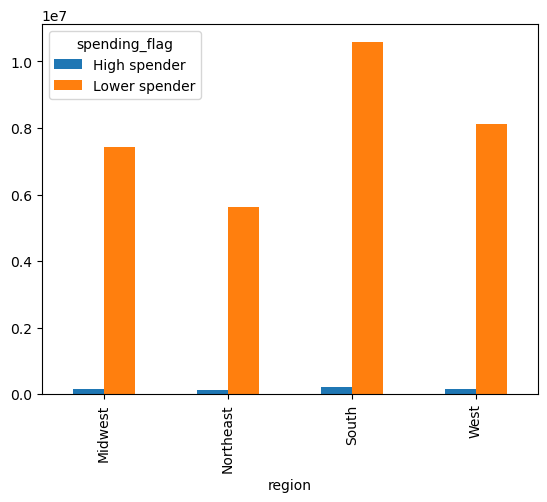

In [18]:
#bar graph for crosstable
bar_region_spending_flag = crosstab.plot.bar()


#### most customers are lower spender in all regions. south region showing the highest total spending amoung both low and high spender

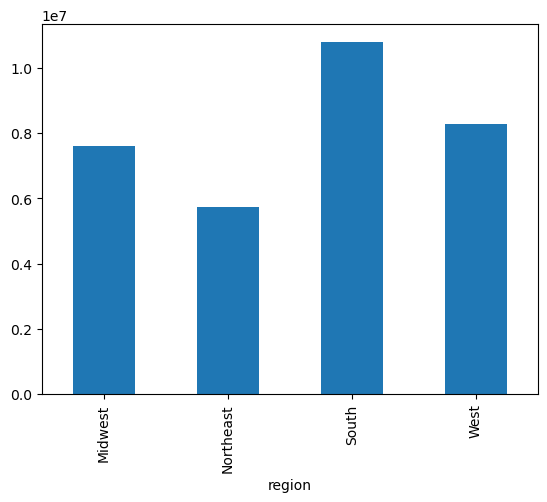

In [24]:
## calculate customer count in all region
customer_count_plot = df_final.groupby('region')['user_id'].count().plot.bar()

## most of customers are from south region that why south region generate highest revenue.

In [26]:
## saving graph 
bar_region_spending_flag.figure.savefig(os.path.join(path,'Analysis', 'visualizations','bar_region_spending.png'))

In [27]:
## saving customer count graph
customer_count_plot.figure.savefig(os.path.join(path,'Analysis', 'visualizations','customer_count_region.png'))

## 4 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [7]:
##create dataframe that count unique order of user 
df_filter_less_order = df_final.groupby('user_id')['order_id'].nunique().reset_index()

In [8]:
df_filter_less_order.columns= ['user_id','order_count']

In [9]:
df_filter_less_order.head()

,user_id,order_count
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [10]:
## merge subset datafarme with main datafraame
df_final_update = df_final.merge(df_filter_less_order,on='user_id', how='inner')

In [11]:
#create columns if user place order more than 5 time than value will be true oterhwies value will be flase
df_final_update['Exclusion_Flag'] = df_final_update['order_count'] < 5

In [15]:
df_final_update.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,...,Gender,State,Age,date_joined,Number_dependants,Family_status,income,region,order_count,Exclusion_Flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,32,False
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,32,False
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,5,False
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,3,True
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,3,True


In [12]:
##create main dataframe after removeing customer who place less than 5 orders
df_main = df_final_update[df_final_update['Exclusion_Flag'] == False]

In [13]:
df_main.shape

(30964518, 33)

In [40]:
## profile base on age

In [39]:
df_main['Age'].describe()

count    3.096452e+07
mean     4.946802e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

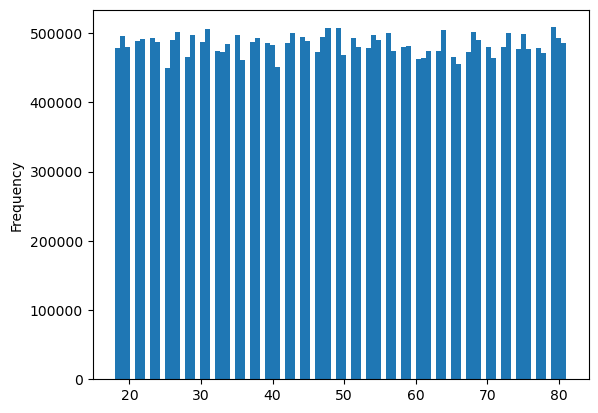

In [43]:
df_main['Age'].plot.hist(bins=90)

In [44]:
## create young adult group, mid-age adult,and senior group

In [14]:
df_main.loc[df_main['Age'] <=30 , 'age_group'] = 'young_adult'
df_main.loc[(df_main['Age'] > 30) & (df_main['Age'] <=60), 'age_group'] = 'mid-age_adult'
df_main.loc[df_main['Age'] > 60 , 'age_group'] = 'senior'


C:\Users\hardi\AppData\Local\Temp\ipykernel_17692\420488611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[df_main['Age'] <=30 , 'age_group'] = 'young_adult'


In [47]:
age_group_count = df_main['age_group'].value_counts()

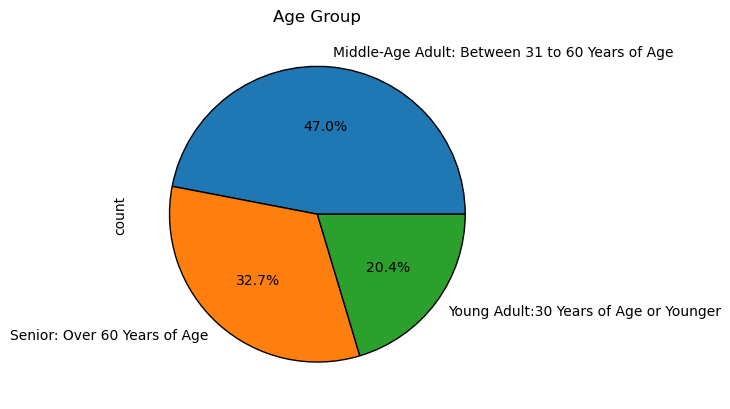

In [51]:
pie_age = age_group_count.plot.pie(
    labels=('Middle-Age Adult: Between 31 to 60 Years of Age','Senior: Over 60 Years of Age','Young Adult:30 Years of Age or Younger'),
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'}
    
)
plt.title('Age Group')
plt.show()

In [52]:
pie_age.figure.savefig(os.path.join(path,'Analysis', 'visualizations','age_group_pie.png'))

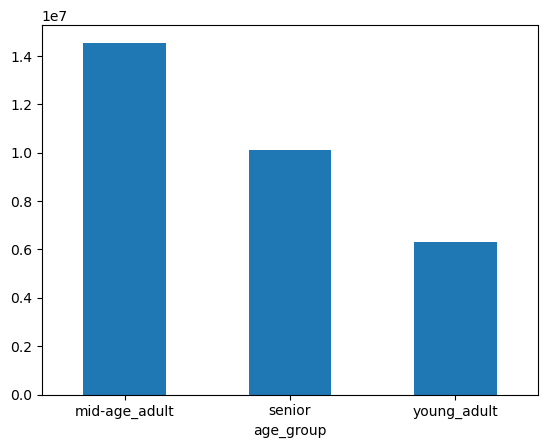

In [63]:
age_group_count= df_main['age_group'].value_counts()
age_group_hist = age_group_count.plot.bar(rot=0,)

In [54]:
age_group_hist.figure.savefig(os.path.join(path,'Analysis', 'visualizations','age_group_hist.png'))

In [55]:
## profile based on income

<Axes: ylabel='Frequency'>

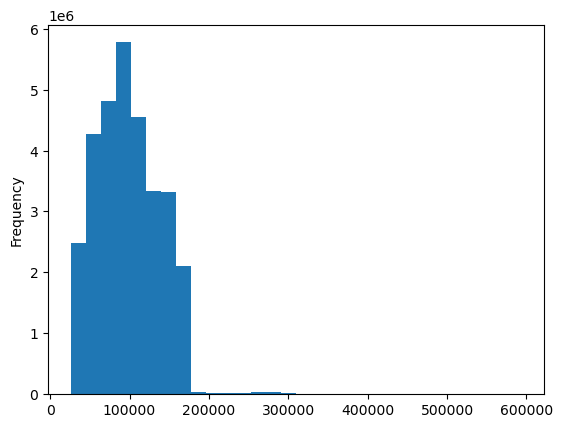

In [56]:
df_main['income'].plot.hist(bins=30)

In [15]:
##creating income group low_income,middle_income and high_income
df_main.loc[df_main['income'] <=60000, 'income_group'] = 'low_income'
df_main.loc[(df_main['income'] > 60000) & (df_main['income'] <= 120000), 'income_group'] = 'middle_income'
df_main.loc[df_main['income'] > 120000, 'income_group'] = 'high_income'

C:\Users\hardi\AppData\Local\Temp\ipykernel_17692\3585443450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[df_main['income'] <=60000, 'income_group'] = 'low_income'


In [61]:
income_group_count = df_main['income_group'].value_counts()

Text(0.5, 1.0, 'Income Group ')

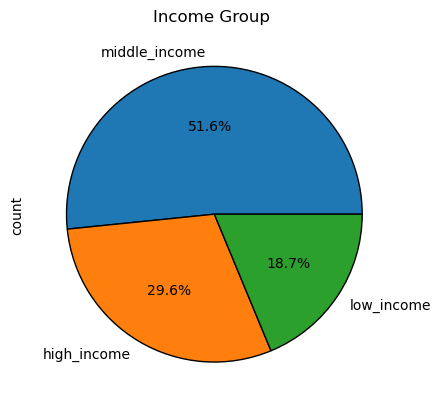

In [62]:
income_group_pie_chart = income_group_count.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Group ')

In [64]:
income_group_pie_chart.figure.savefig(os.path.join(path,'Analysis', 'visualizations','income_group_distribution_pie.png'))

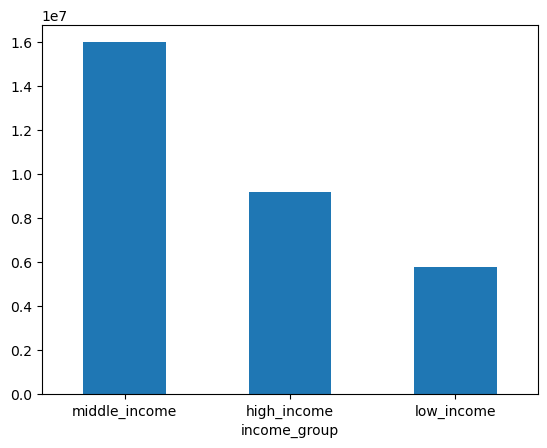

In [66]:
income_group_hist = income_group_count.plot.bar(rot=0)

In [67]:
income_group_hist.figure.savefig(os.path.join(path,'Analysis', 'visualizations','income_group_distribution_hist.png'))

In [68]:
## Profile Number of Dependants

In [69]:
df_main['Number_dependants'].value_counts()

Number_dependants
3    7772514
0    7739646
2    7733261
1    7719097
Name: count, dtype: int64

In [16]:
df_main.loc[df_main['Number_dependants'] <= 1, 'dependants_group'] = 'small'
df_main.loc[df_main['Number_dependants'] == 2, 'dependants_group'] = 'medium'
df_main.loc[df_main['Number_dependants'] >= 3 , 'dependants_group'] = 'large'

C:\Users\hardi\AppData\Local\Temp\ipykernel_17692\1106016590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[df_main['Number_dependants'] <= 1, 'dependants_group'] = 'small'


In [74]:
dep_group_count = df_main['dependants_group'].value_counts()

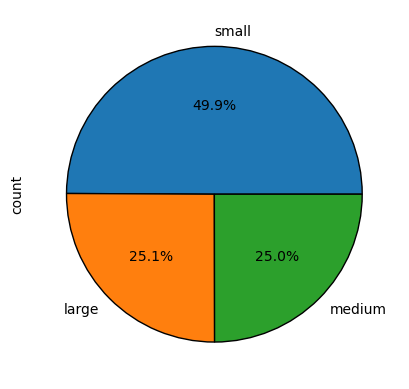

In [75]:
pie_dependents_group = dep_group_count.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

In [76]:
pie_dependents_group.figure.savefig(os.path.join(path,'Analysis', 'visualizations','number_dependents_pie.png'))

In [77]:
## Profiling order_days_of_week

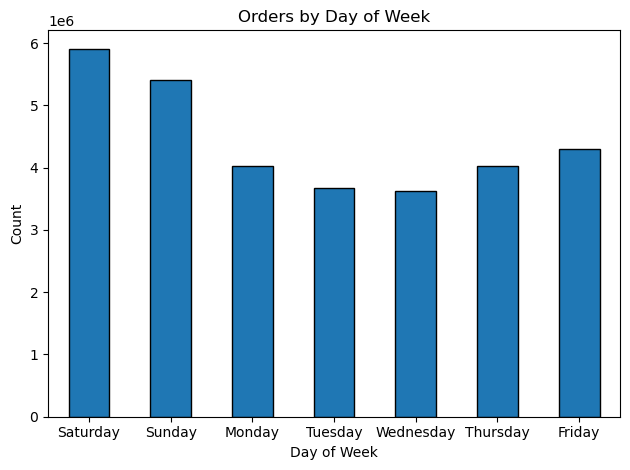

In [79]:
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
order_day_by_week = df_main['orders_day_of_the_week'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [80]:
order_day_by_week.figure.savefig(os.path.join(path,'Analysis', 'visualizations','order_day_by_week.png'))

In [17]:
df_main.loc[df_main['orders_day_of_the_week'].isin([0,1]),'week_day_category'] = 'weekend'


C:\Users\hardi\AppData\Local\Temp\ipykernel_17692\2860337921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[df_main['orders_day_of_the_week'].isin([0,1]),'week_day_category'] = 'weekend'


In [18]:
df_main.loc[df_main['orders_day_of_the_week'].isin([2,3,4,5,6]),'week_day_category'] = 'weekday'

In [84]:
week_day_count = df_main['week_day_category'].value_counts()

Text(0.5, 1.0, 'Weekday Order Placement')

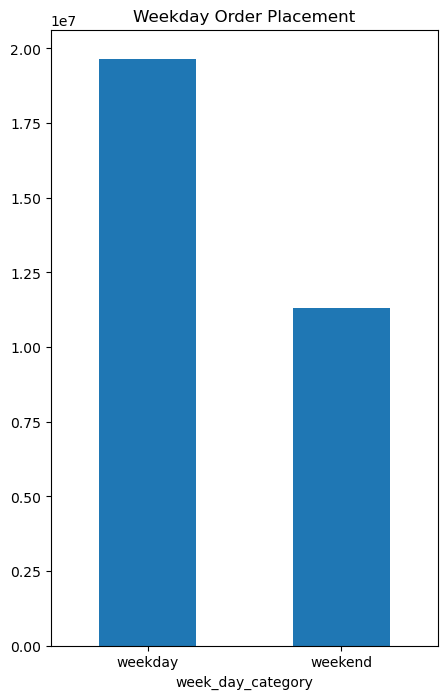

In [87]:
plt.figure(figsize=(5,8))
week_day_order_count_hist = week_day_count.plot.bar(rot=0)
plt.title('Weekday Order Placement')

In [88]:
week_day_order_count_hist.figure.savefig(os.path.join(path,'Analysis', 'visualizations','week_day_order_count_hist.png'))

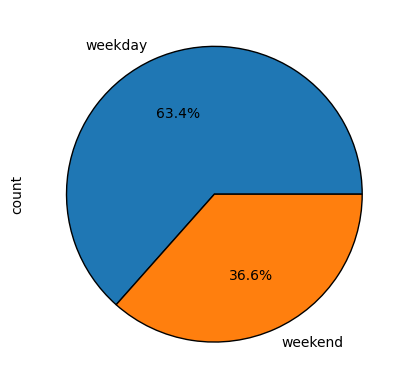

In [90]:
week_dat_order_count_pie = week_day_count.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})

In [91]:
week_dat_order_count_pie.figure.savefig(os.path.join(path,'Analysis', 'visualizations','week_day_order_count_pie.png'))

In [92]:
## Profiling order_hour_of_day

Text(0.5, 1.0, 'Orders by Daily Hour')

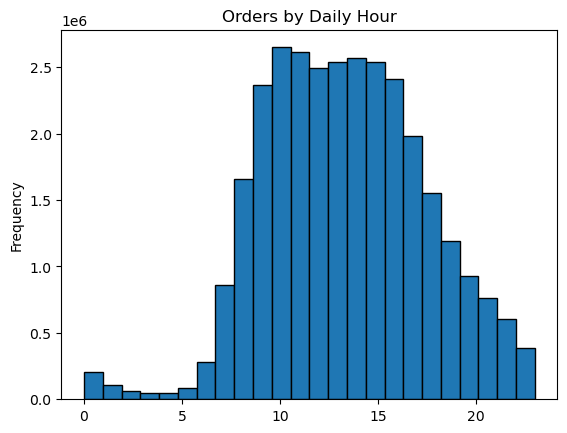

In [96]:
order_by_hour_hist = df_main['order_hour_of_day'].plot.hist(bins=24,edgecolor='black')
plt.title('Orders by Daily Hour')

In [97]:
order_by_hour_hist.figure.savefig(os.path.join(path,'Analysis', 'visualizations','order_by_hour_hist.png'))

In [19]:
df_main.loc[df_main['order_hour_of_day'] < 12, 'order_hour_group'] = 'morning'
df_main.loc[(df_main['order_hour_of_day'] >= 12) & (df_main['order_hour_of_day'] <= 17),'order_hour_group'] = 'afternoon'
df_main.loc[df_main['order_hour_of_day'] > 17, 'order_hour_group'] = 'evening'

C:\Users\hardi\AppData\Local\Temp\ipykernel_17692\395339187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[df_main['order_hour_of_day'] < 12, 'order_hour_group'] = 'morning'


In [100]:
order_hour_group_count = df_main['order_hour_group'].value_counts()

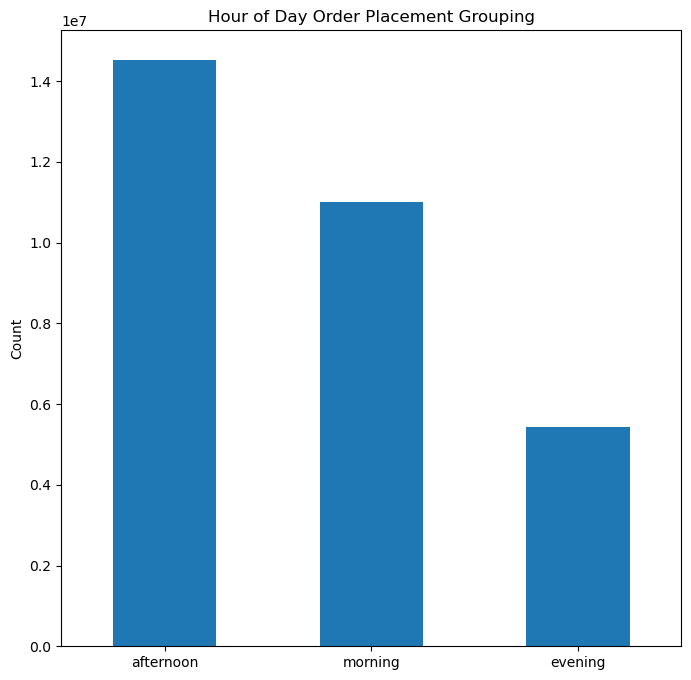

In [103]:
plt.figure(figsize=(8,8))
order_hour_group_count_bar=order_hour_group_count.plot.bar(rot=0)
plt.title('Hour of Day Order Placement Grouping')
plt.xlabel('')
plt.ylabel('Count')



# Add the custom legend

plt.show()
plt.tight_layout
plt.show()

In [104]:
order_hour_group_count_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','order_hour_group_count_bar.png'))

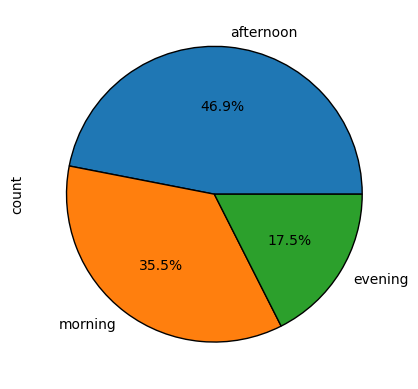

In [107]:
order_hour_group_count_pie = order_hour_group_count.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})

In [108]:
order_hour_group_count_pie.figure.savefig(os.path.join(path,'Analysis', 'visualizations','order_hour_group_count_pie.png'))

In [109]:
## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [20]:
df_main.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_number_order', 'loyalty_flag',
       'mean_price_spent_customer', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'Number_dependants', 'Family_status', 'income', 'region', 'order_count',
       'Exclusion_Flag', 'age_group', 'income_group', 'dependants_group',
       'week_day_category', 'order_hour_group'],
      dtype='object')

In [22]:
df_main.to_pickle(os.path.join(path,'Data','main_df.pkl'))

In [87]:
user_agg = df_main.groupby('user_id').agg({'days_since_last_order':['mean','max','min'],'orders_day_of_the_week':['mean','max','min'],
                                          'order_hour_of_day':['mean','max','min'],'income':['mean', 'min', 'max']})

In [88]:
user_agg

days_since_last_order            orders_day_of_the_week          \
                         mean   max  min                   mean max min   
user_id                                                                   
1                   18.542373  30.0  0.0               2.644068   4   1   
2                   14.902564  30.0  0.0               2.005128   5   1   
3                   10.181818  21.0  0.0               1.011364   3   0   
4                   11.944444  21.0  0.0               4.722222   6   4   
7                   12.757282  30.0  0.0               1.728155   6   0   
...                       ...   ...  ...                    ...  ..  ..   
206203              23.722689  30.0  0.0               1.621849   5   0   
206206               3.985965  15.0  0.0               2.312281   6   0   
206207              13.278027  30.0  0.0               2.896861   6   0   
206208               7.310192  20.0  0.0               2.760709   6   0   
206209              18.232558  30.0  0.0               2.658915   5   0   

        order_hour_of_day            income                  
                     mean max min      mean     min     max  
user_id                                                      
1               10.542373  16   7   40423.0   40423   40423  
2               10.441026  15   9   64940.0   64940   64940  
3               16.352273  19  14   93240.0   93240   93240  
4               13.111111  15  11   45435.0   45435   45435  
7               13.631068  20   7   89095.0   89095   89095  
...                   ...  ..  ..       ...     ...     ...  
206203          15.705882  18  13  106730.0  106730  106730  
206206          16.796491  20   9   75041.0   75041   75041  
206207          13.130045  21   4  110135.0  110135  110135  
206208          13.968981  23   4  156838.0  156838  156838  
206209          12.922481  18  10  137969.0  137969  137969  

[162627 rows x 12 columns]

In [91]:
agg_group_agg = df_main.groupby('age_group').agg({'days_since_last_order':['mean','min','max'],'prices':['mean','min','max']})

In [90]:
agg_group_agg

days_since_last_order                prices              
                               mean  min   max       mean  min      max
age_group                                                              
mid-age_adult             10.232082  0.0  30.0  11.957405  1.0  99999.0
senior                    10.211176  0.0  30.0  11.806151  1.0  99999.0
young_adult               10.256848  0.0  30.0  12.082744  1.0  99999.0

In [93]:
income_group_agg=df_main.groupby('income_group').agg({'days_since_last_order':['mean','min','max'],'prices':['mean','min','max']})

In [94]:
income_group_agg

days_since_last_order                prices              
                               mean  min   max       mean  min      max
income_group                                                           
high_income               10.186706  0.0  30.0  20.047301  1.0  99999.0
low_income                10.428962  0.0  30.0   7.091280  1.0  14900.0
middle_income             10.183194  0.0  30.0   9.031513  1.0  99999.0

In [95]:
dependant_size_agg= df_main.groupby('dependants_group').agg({'days_since_last_order':['mean','min','max'],'prices':['mean','min','max']})

In [96]:
dependant_size_agg

days_since_last_order                prices              
                                  mean  min   max       mean  min      max
dependants_group                                                          
large                        10.238608  0.0  30.0  11.791609  1.0  99999.0
medium                       10.248448  0.0  30.0  12.284472  1.0  99999.0
small                        10.217037  0.0  30.0  11.829319  1.0  99999.0

In [97]:
week_day_category_agg = df_main.groupby('week_day_category').agg({'days_since_last_order':['mean','min','max'],'prices':['mean','min','max']})

In [98]:
week_day_category_agg

days_since_last_order                prices              
                                   mean  min   max       mean  min      max
week_day_category                                                          
weekday                       10.047178  0.0  30.0  12.124126  1.0  99999.0
weekend                       10.548065  0.0  30.0  11.602775  1.0  99999.0

In [99]:
order_hour_group_agg = df_main.groupby('order_hour_group').agg({'days_since_last_order':['mean','min','max'],'prices':['mean','min','max']})

In [100]:
order_hour_group_agg

days_since_last_order                prices              
                                  mean  min   max       mean  min      max
order_hour_group                                                          
afternoon                    10.385642  0.0  30.0  12.009865  1.0  99999.0
evening                      10.056050  0.0  30.0  11.559263  1.0  99999.0
morning                      10.111044  0.0  30.0  12.017436  1.0  99999.0

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [23]:
age_region_comparsion = pd.crosstab(df_main['age_group'], df_main['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

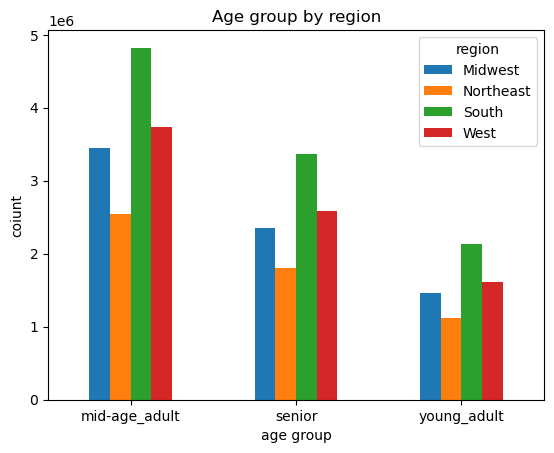

In [25]:
plt.figure(figsize=(10,7))
age_region_compare_bar = age_region_comparsion.plot(kind='bar',rot=0)
plt.title('Age group by region')
plt.xlabel('age group')
plt.ylabel('coiunt')
plt.legend(title='region')
plt.show()

In [26]:
age_region_compare_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','age_region_compare.png'))

In [27]:
age_customer_freqhency = pd.crosstab(df_main['age_group'],df_main['frequency_flag'],dropna=False)

<Figure size 1000x700 with 0 Axes>

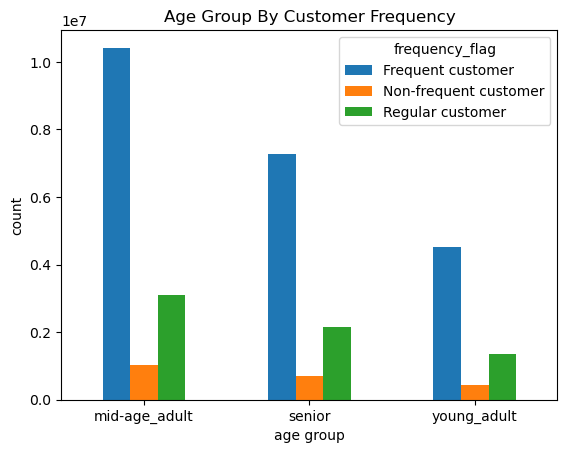

In [28]:
plt.figure(figsize=(10,7))
age_region_freqhency_bar = age_customer_freqhency.plot(kind='bar',rot=0)
plt.title('Age Group By Customer Frequency')
plt.xlabel('age group')
plt.ylabel('count')
#plt.legend(title='region')
plt.show()

In [29]:
age_region_freqhency_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','age_region_freqhency_bar.png'))

In [30]:
age_loyalty_compare =  pd.crosstab(df_main['age_group'],df_main['loyalty_flag'],dropna=False)

<Figure size 1000x700 with 0 Axes>

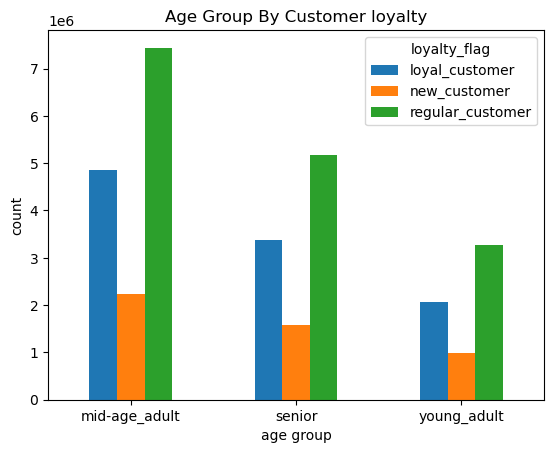

In [32]:
plt.figure(figsize=(10,7))
age_loyalty_compare_bar = age_loyalty_compare.plot(kind='bar',rot=0)
plt.title('Age Group By Customer loyalty')
plt.xlabel('age group')
plt.ylabel('count')
#plt.legend(title='region')
plt.show()

In [33]:
age_loyalty_compare_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','age_loyalty_compare_bar.png'))

In [34]:
income_region_compare = pd.crosstab(df_main['income_group'],df_main['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

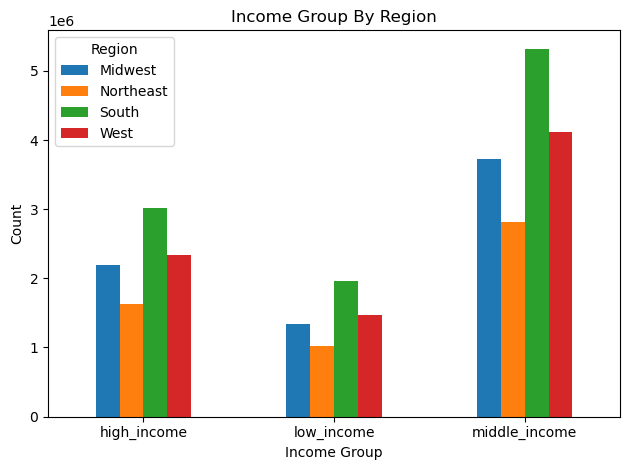

In [35]:
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_compare.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [36]:
income_region_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','income_region_comparison_bar.png'))

In [37]:
dependant_size_region_comapre=pd.crosstab(df_main['dependants_group'],df_main['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

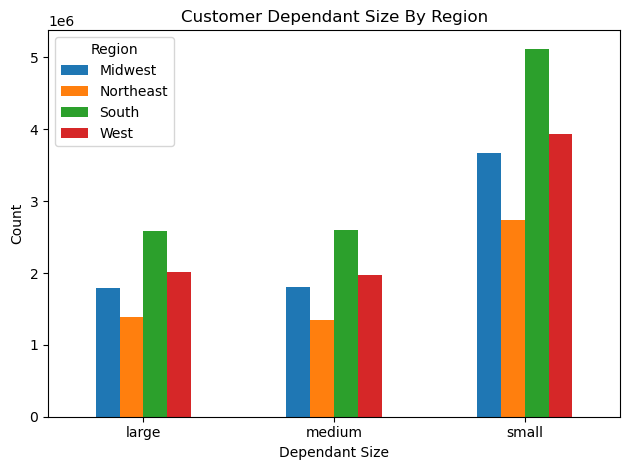

In [38]:
plt.figure(figsize=(10, 7))
dependant_size_region_comparison_bar= dependant_size_region_comapre.plot(kind='bar',rot=0)
plt.title('Customer Dependant Size By Region')
plt.xlabel('Dependant Size')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [39]:
dependant_size_region_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','dependant_size_region_comparison_bar.png'))

In [40]:
week_day_category_region_comparison=pd.crosstab(df_main['week_day_category'],df_main['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

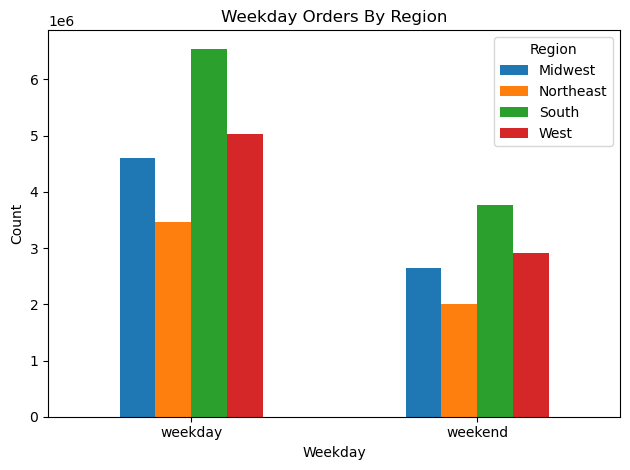

In [41]:
plt.figure(figsize=(10, 7))
week_day_category_region_comparison_bar= week_day_category_region_comparison.plot(kind='bar',rot=0)
plt.title('Weekday Orders By Region')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [42]:
week_day_category_region_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','week_day_category_region_comparison_bar.png'))

In [43]:
order_hour_group_region_comparison=pd.crosstab(df_main['order_hour_group'],df_main['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

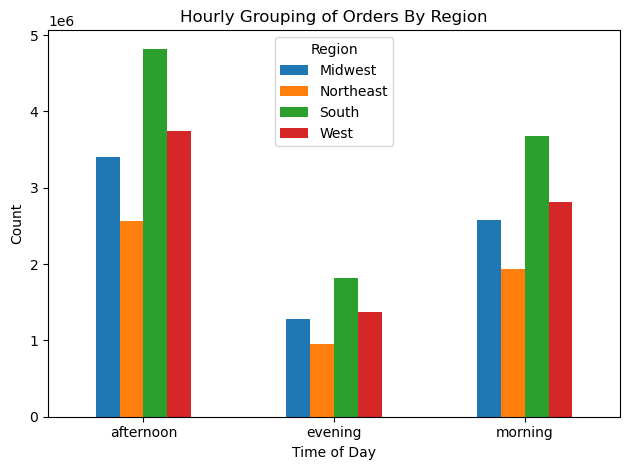

In [44]:
plt.figure(figsize=(10, 7))
order_hour_group_region_comparison_bar= order_hour_group_region_comparison.plot(kind='bar',rot=0)
plt.title('Hourly Grouping of Orders By Region')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [45]:
order_hour_group_region_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','order_hour_group_region_comparison_bar.png'))

In [46]:
region_customer_frequency_comparison=pd.crosstab(df_main['region'],df_main['frequency_flag'])

<Figure size 1000x700 with 0 Axes>

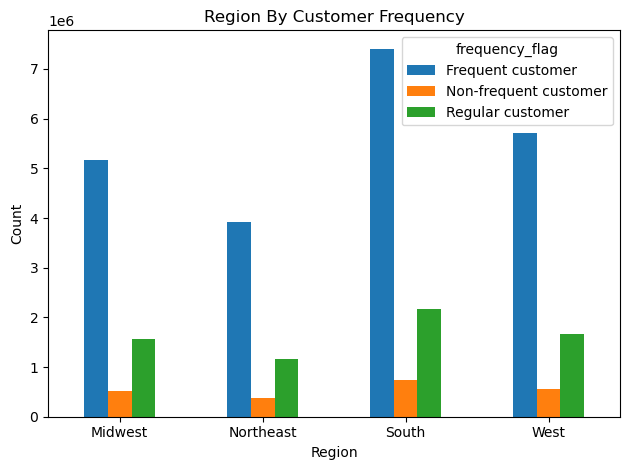

In [47]:
plt.figure(figsize=(10, 7))
region_customer_frequency_comparison_bar= region_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Region By Customer Frequency')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [48]:
region_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','region_customer_frequency_comparison_bar.png'))

In [49]:
region_type_of_spender_comparison=pd.crosstab(df_main['region'],df_main['spending_flag'],dropna=False)

<Figure size 0x0 with 0 Axes>

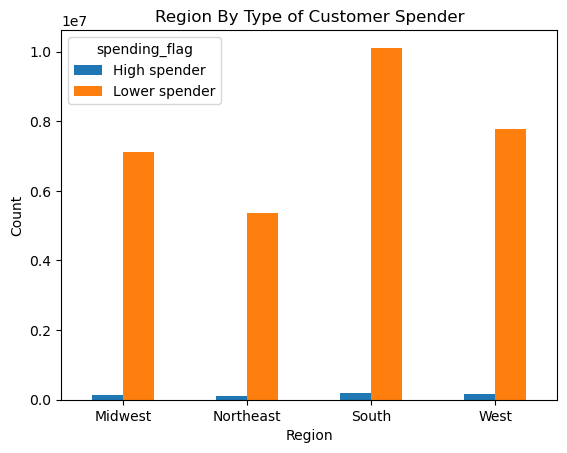

In [50]:
plt.figure(figsize=(0, 0))
region_type_of_spender_comparison_bar= region_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Region By Type of Customer Spender')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [51]:
region_type_of_spender_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','region_type_of_spender_comparison_bar.png'))

In [53]:
# Creating crosstab to compare loyalty_flag with type_of_spender
loyalty_type_of_spender_comparison=pd.crosstab(df_main['loyalty_flag'],df_main['spending_flag'],dropna=False)

<Figure size 0x0 with 0 Axes>

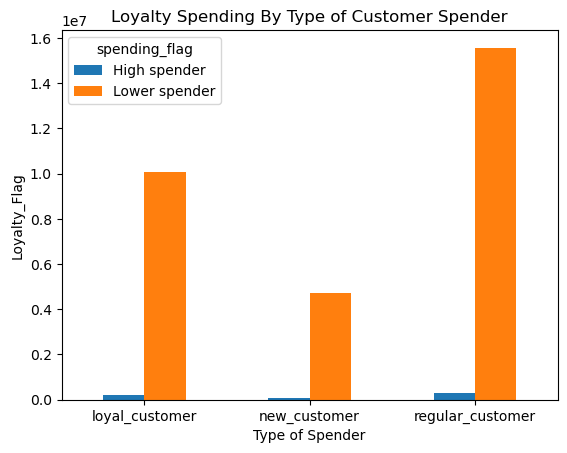

In [54]:
plt.figure(figsize=(0, 0))
loyalty_type_of_spender_comparison_bar= loyalty_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Loyalty Spending By Type of Customer Spender')
plt.xlabel('Type of Spender')
plt.ylabel('Loyalty_Flag')
plt.show()

In [55]:
loyalty_type_of_spender_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','loyalty_type_of_spender_comparison_bar.png'))

## Profiles Compared with Departments

In [65]:
df_dept = pd.read_csv(os.path.join(path,'Data','prepare_data','departments_wrangled.csv'),index_col=False).reset_index()

In [66]:
df_dept.head()

,index,department
0,0,frozen
1,1,other
2,2,bakery
3,3,produce
4,4,alcohol


In [67]:
df_dept.rename(columns={'index':'department_id'},inplace=True)

In [68]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [70]:
df_main.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_number_order', 'loyalty_flag',
       'mean_price_spent_customer', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'Number_dependants', 'Family_status', 'income', 'region', 'order_count',
       'Exclusion_Flag', 'age_group', 'income_group', 'dependants_group',
       'week_day_category', 'order_hour_group'],
      dtype='object')

In [71]:
df = df_main.merge(df_dept,on='department_id',how='inner')

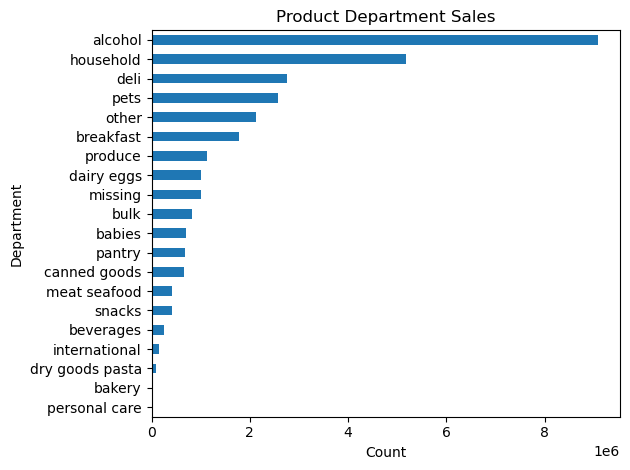

In [72]:
dept_bar=df['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [73]:
dept_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','dept_bar.png'))

In [74]:
age_department_comparison=pd.crosstab(df['age_group'],df['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

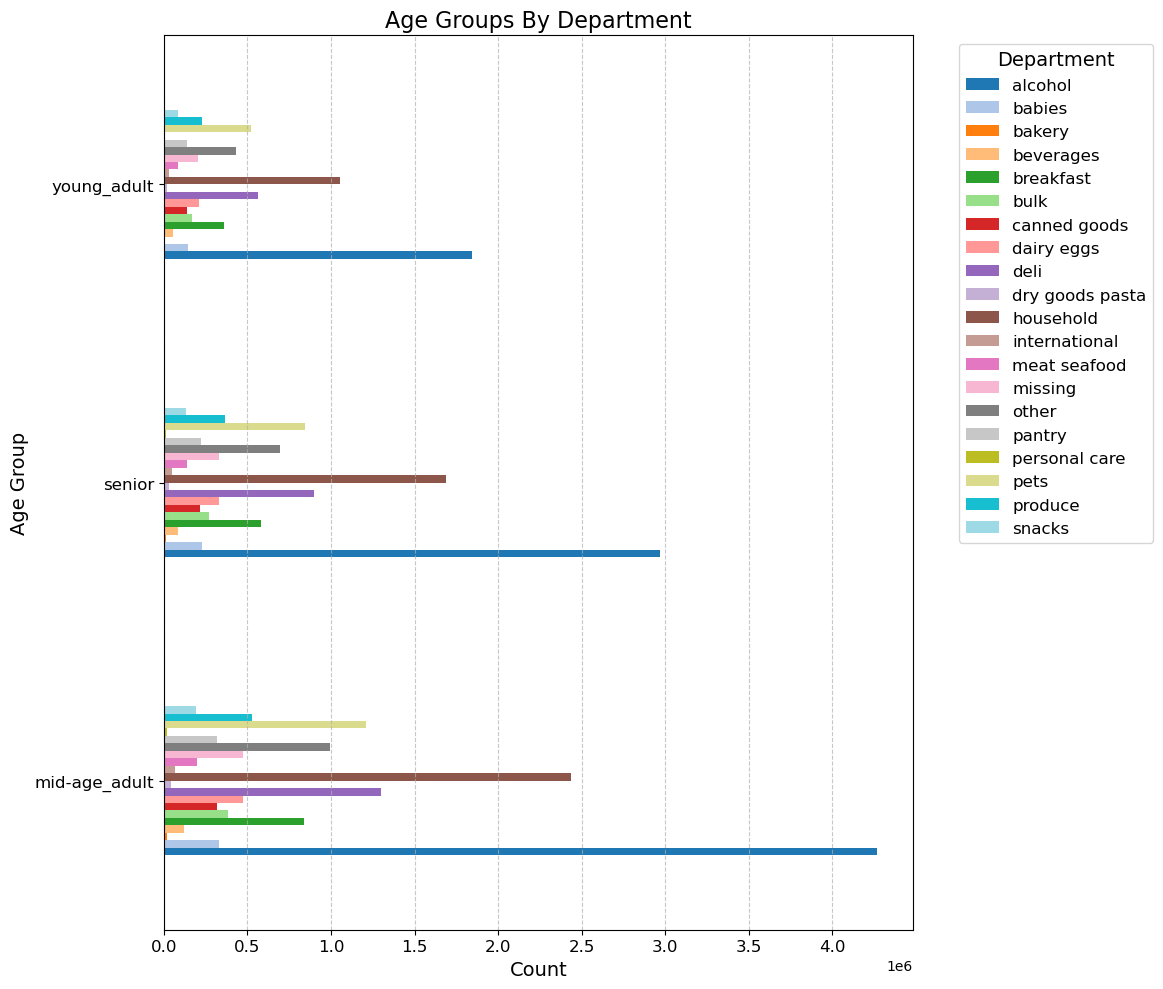

In [75]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [76]:
age_department_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','age_department_comparison_bar.png'))

In [77]:
income_group_department_comparison=pd.crosstab(df['income_group'],df['department'],dropna=False)

<Figure size 1800x1200 with 0 Axes>

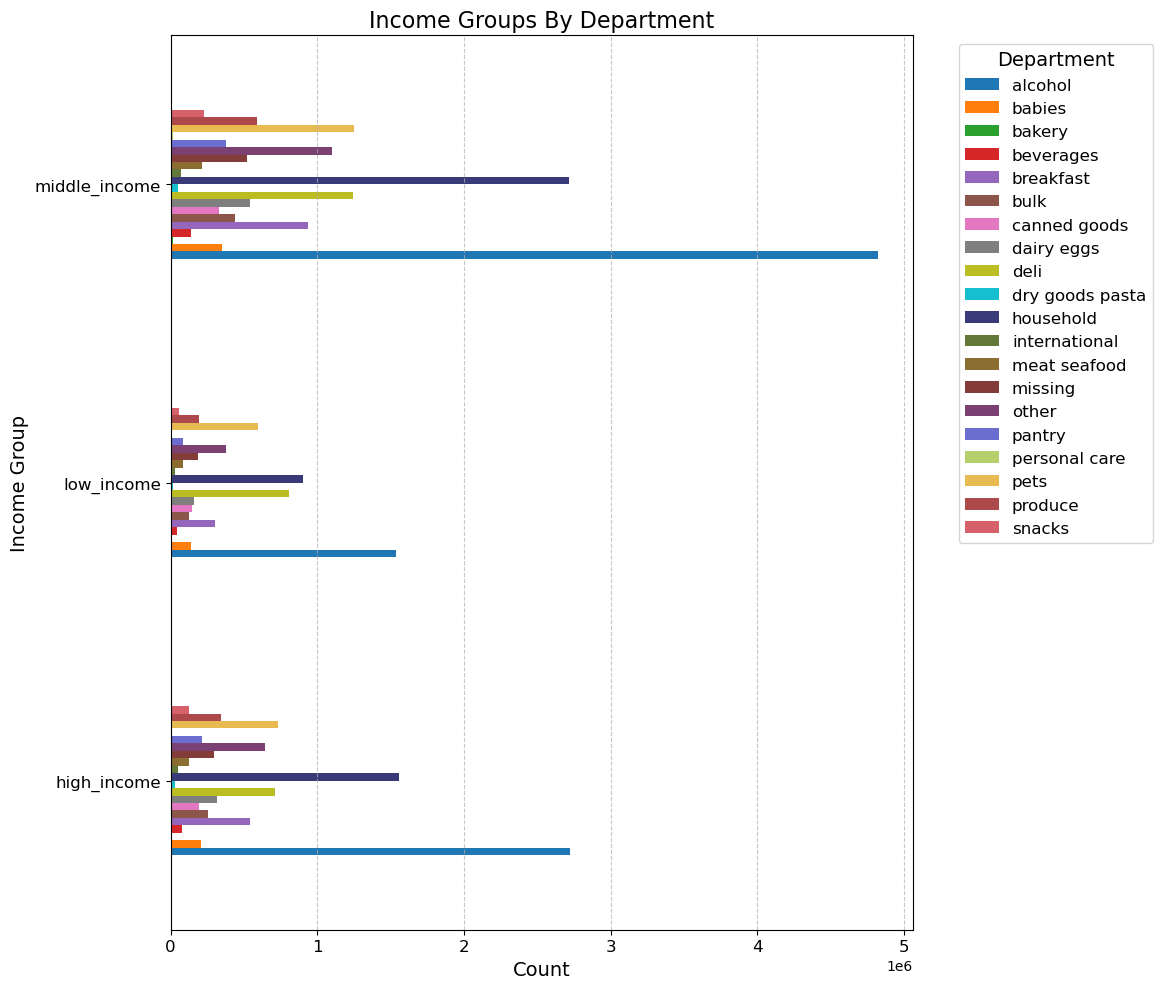

In [78]:
# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

# Create a bar chart with custom colors
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh',
    figsize=(14, 10),
    color=custom_colors,
    rot=0
)

# Add title and labels with larger font size
plt.title('Income Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [79]:
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','income_group_department_comparison_bar.png'))

In [80]:
region_department_comparison=pd.crosstab(df['region'],df['department'],dropna=False)

<Figure size 2000x2500 with 0 Axes>

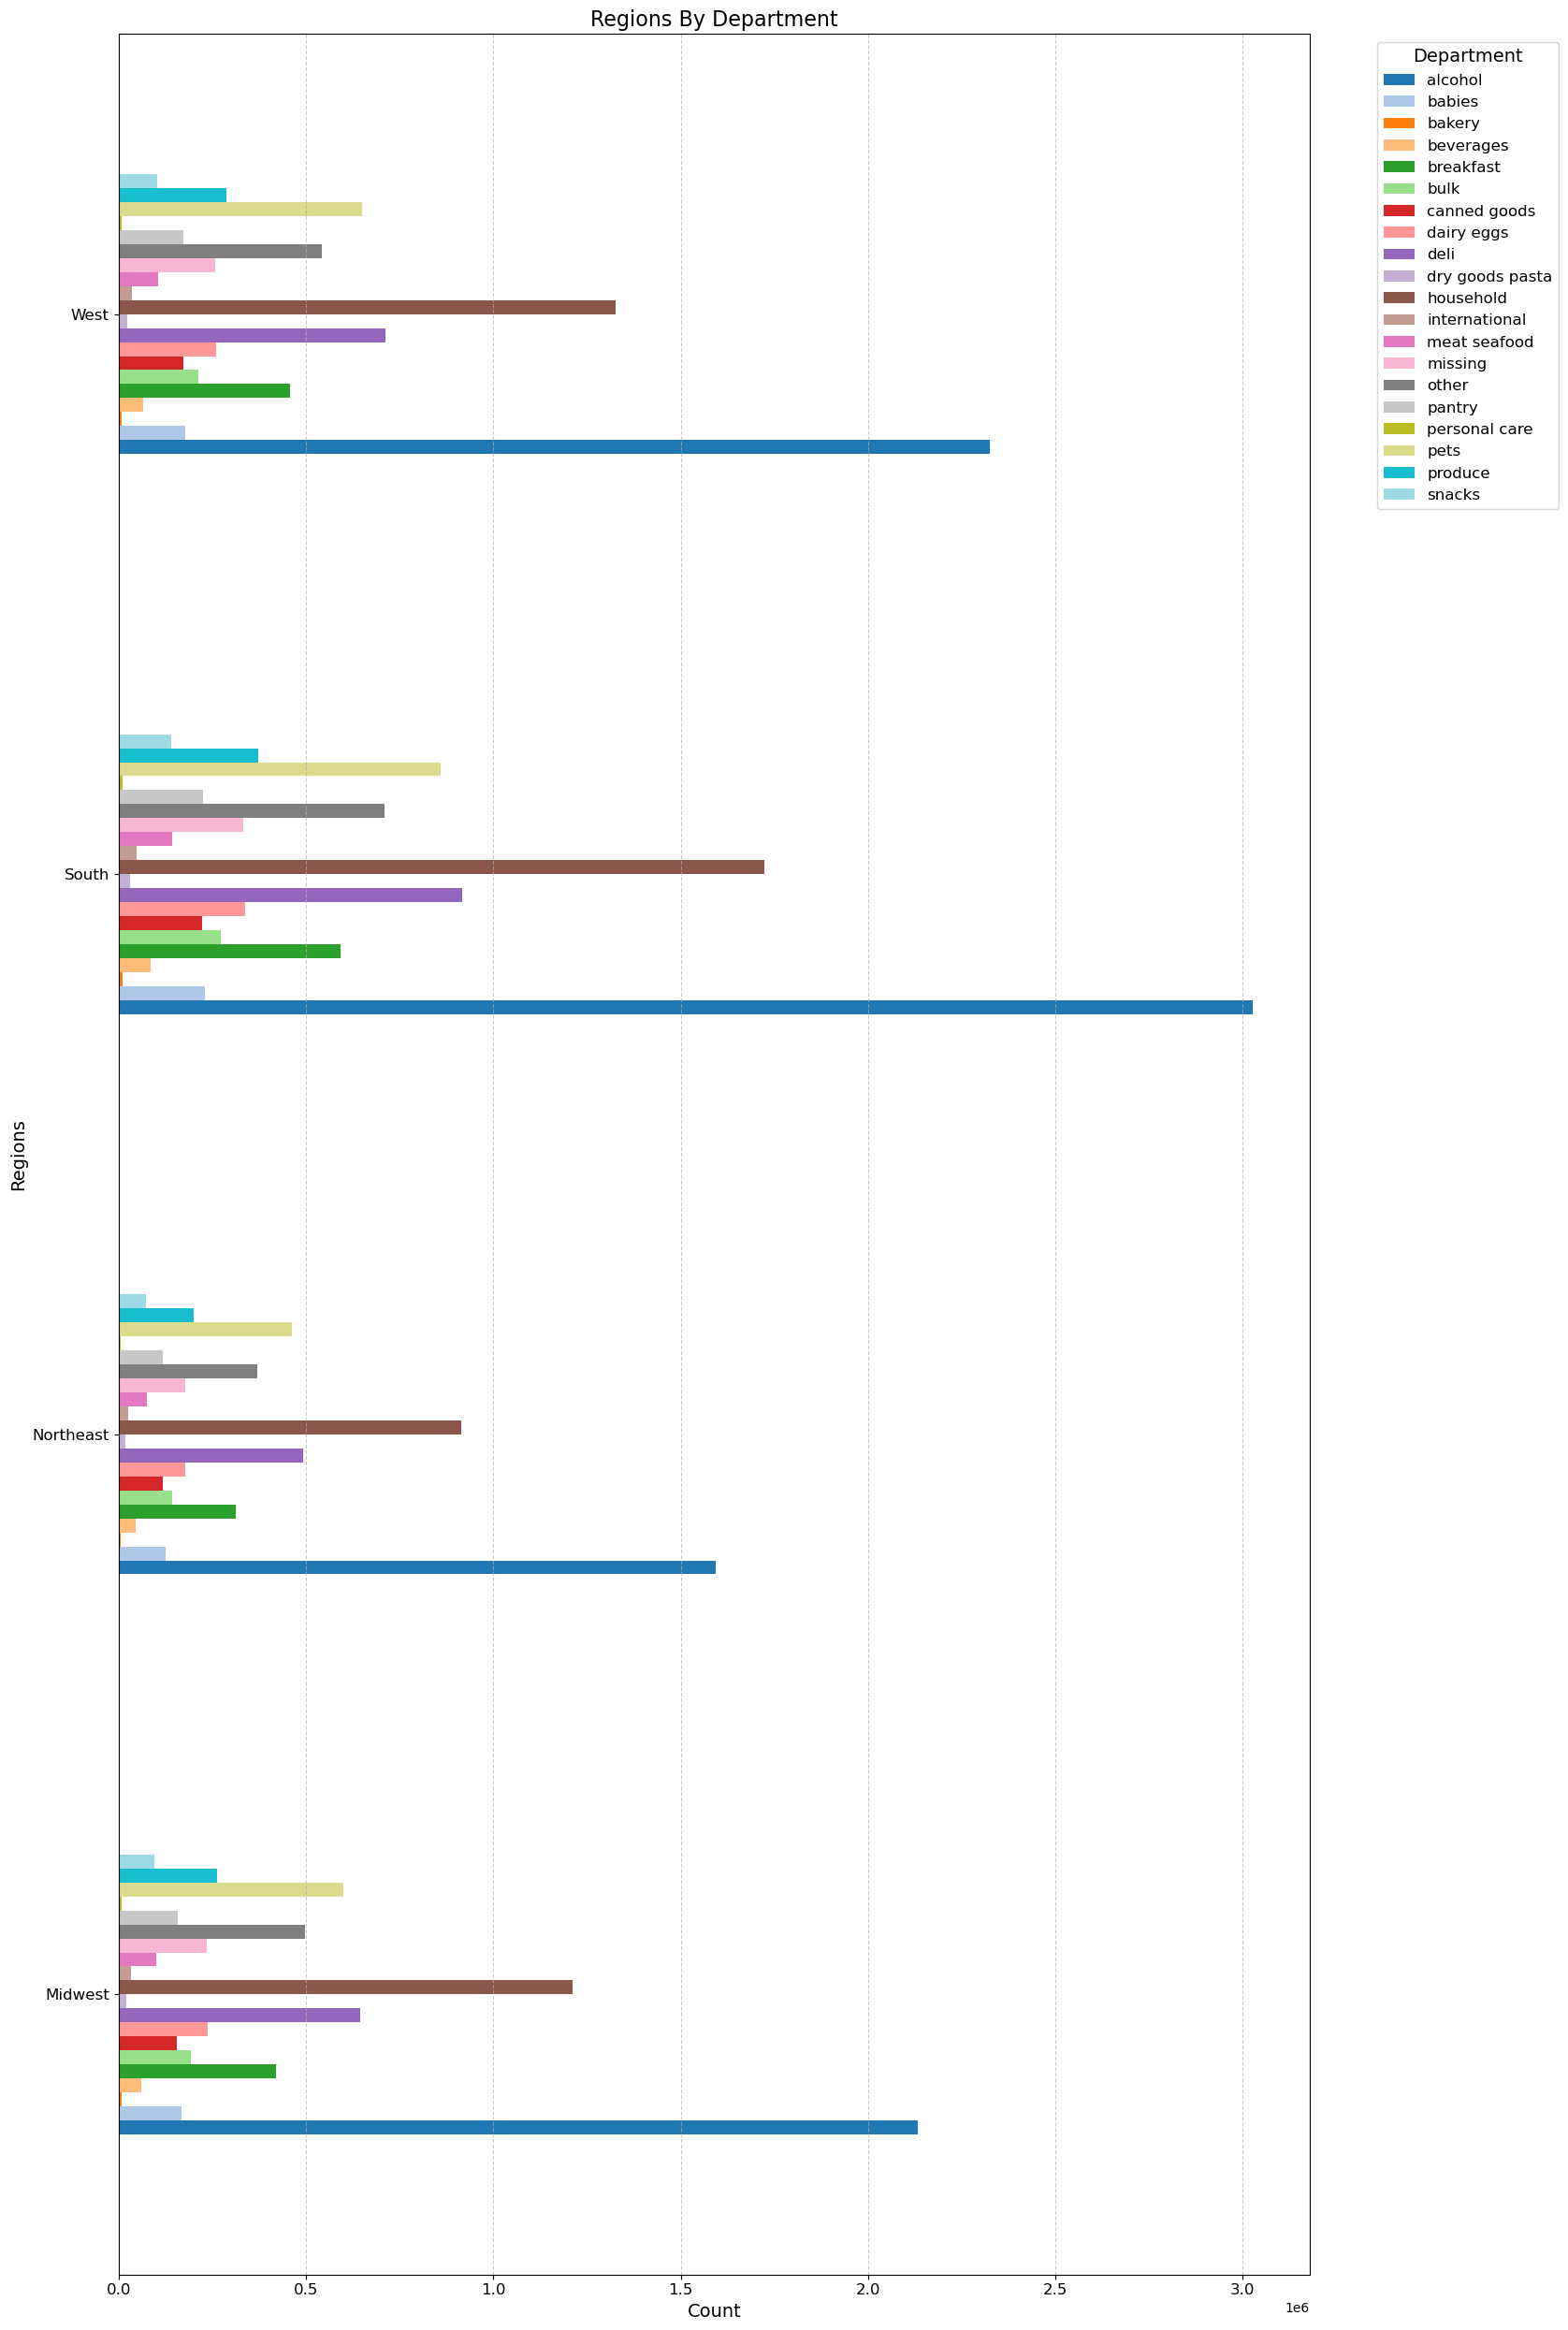

In [81]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [84]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_number_order', 'loyalty_flag',
       'mean_price_spent_customer', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'Number_dependants', 'Family_status', 'income', 'region', 'order_count',
       'Exclusion_Flag', 'age_group', 'income_group', 'dependants_group',
       'week_day_category', 'order_hour_group', 'department'],
      dtype='object')

In [82]:
region_department_comparison_bar.figure.savefig(os.path.join(path,'Analysis', 'visualizations','region_department_comparison_bar.png'))